# Churn Prediction

# Loading & Preparation

In [1]:
import pandas as pd
import numpy as np
import wget

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
link = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

wget.download(link)

100% [............................................................................] 977501 / 977501

'WA_Fn-UseC_-Telco-Customer-Churn (1).csv'

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# excluding (...) for large number of columns
pd.set_option("display.max.columns", None) 

# alternatively we may take a look at all the columns using transpose method
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
# checking datatypes

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# lowercase column names and replace spaces ' ' with underscores '_'

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# filtering columns with object datatype, because we cannot apply string methods to non-string values

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [7]:
# lowercase values and replace spaces ' ' with underscores '_'

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
# changing churn values (our target) from Yes/No to 1/0

df.churn = (df.churn == 'yes').astype(int)
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [9]:
# checking totalcharches fiels, which is object, but apparently should be a number
# this is happening when some values are not numeric, but rather spaces (' '), underscores ('_') and so forth

df.totalcharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: object

In [10]:
# in order to convert it to numbers, we may use "errors='coerce'", which will write them as NaN
# to check how many NaN's are there we may use .isnull().sum()

pd.to_numeric(df.totalcharges, errors='coerce').isnull().sum()

11

In [11]:
# converting & filling NaN's with zeros (alternitevly we could fill them with mean values)

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

# checking
df.totalcharges.isnull().sum()

0

# Setting up the validation framework

In [12]:
# import the library

from sklearn.model_selection import train_test_split

In [13]:
# because sci-kit splits dataset into 2 parts, we'll divide train dataset into training & validation

# splitting into train and test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# splitting train into train & validation
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [14]:
# checking datasets lenght

len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [15]:
# resetting the index

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
# creating our 'y' values (churn) and transforming Series to NumPy array using .values

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

# deleting 'y' (churn) from 'X' dataset

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [17]:
# checking

df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,6776-tlwoi,male,0,no,no,3,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,19.85,64.55
1,0036-ihmot,female,0,yes,yes,55,yes,no,fiber_optic,no,yes,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),103.70,5656.75
2,2843-cqmeg,male,0,no,no,24,yes,no,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed_check,49.70,1218.25
3,3247-mhjkm,male,0,no,no,1,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.20,20.20
4,1194-bhjyc,male,0,yes,no,61,no,no_phone_service,dsl,yes,no,yes,yes,yes,yes,two_year,yes,mailed_check,62.15,3778.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1271-sjbgz,male,1,no,no,12,no,no_phone_service,dsl,no,no,yes,yes,no,yes,month-to-month,yes,electronic_check,43.65,526.95
4221,5977-ckhon,female,0,yes,yes,43,yes,yes,fiber_optic,no,no,yes,no,no,yes,month-to-month,yes,bank_transfer_(automatic),92.55,4039.00
4222,3635-jbpsg,female,0,no,no,15,no,no_phone_service,dsl,no,yes,no,no,no,yes,two_year,yes,mailed_check,38.80,603.00
4223,4475-nvtlu,male,0,yes,yes,45,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,19.20,903.70


# Exploratory data analysis

In [18]:
# we'll do EDA on our train & val combined dataset

# first, we'll reset its index

df_full_train.reset_index(drop=True, inplace=True)
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4223-bkeor,female,0,no,yes,21,yes,no,dsl,yes,no,yes,no,no,yes,one_year,no,mailed_check,64.85,1336.80,0
1,6035-riiom,female,0,no,no,54,yes,yes,fiber_optic,no,yes,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),97.20,5129.45,0
2,3797-vtidr,male,0,yes,no,1,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,yes,electronic_check,23.45,23.45,1
3,2568-brgyx,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.20,237.95,1
4,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,yes,bank_transfer_(automatic),61.90,0.00,0


In [19]:
# checking missing values

df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
# checking distribution of our target variable

df_full_train.churn.value_counts()

0    4138
1    1496
Name: churn, dtype: int64

In [21]:
# we may check the share of each condition adding 'normalize=True'
# we have a 26.55% global churn rate

df_full_train.churn.value_counts(normalize=True)

0    0.734469
1    0.265531
Name: churn, dtype: float64

In [22]:
round(df_full_train.churn.mean(), 2)

0.27

In [23]:
# filtering numerical variable

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [24]:
# filtering categorical variables

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [25]:
# checking number of unique values in categorical variables

df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# Feature importance: Churn rate and risk ratio

Churn rate: Difference between mean of the target variable and mean of categories for a feature. The larger differences are indicators that a variable is more important than others.

Risk ratio: Ratio between mean of a feature and mean of the target variable (global churn). If this ratio is greater than 1, the category is more likely to churn, and if the ratio is lower than 1, the category is less likely to churn. It expresses the feature importance in relative terms.

In [26]:
# calculating mean churn rate for the dataset

global_churn = df_full_train.churn.mean()
global_churn

0.2655307064252751

In [27]:
# example of calculating mean churn rate based on a variable

df_full_train[df_full_train['gender'] == 'male'].churn.mean()

0.26047800484932454

In [28]:
from IPython.display import display

In [29]:
# the bigger difference between the risk within the same group, the bigger importance this variable has
# for example, partner variable (0.75...1.23) has a bigger importance than gender (0.98...1.02)

# we'll loop over all the categorical variables and calculate churn rate and risk ratio

for i in categorical:
    print(i)
    # df.groupby('x').y.agg([mean()]) returns a dataframe with mean of y series grouped by x series
    df_group = df_full_train.groupby(i).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    # display(x) displays an output in the cell of a jupyter notebook
    display(df_group)
    # adding few lines between displays
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.237098,4728,-0.028433,0.892922
1,0.413907,906,0.148377,1.558793




partner


,mean,count,diff,risk
partner,,,,
no,0.326446,2904,0.060916,1.229411
yes,0.200733,2730,-0.064798,0.755968




dependents


,mean,count,diff,risk
dependents,,,,
no,0.312326,3951,0.046795,1.176233
yes,0.155674,1683,-0.109856,0.586276




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.253623,552,-0.011908,0.955156
yes,0.266824,5082,0.001293,1.004871




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.251397,2685,-0.014134,0.946771
no_phone_service,0.253623,552,-0.011908,0.955156
yes,0.284105,2397,0.018574,1.069952




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.191851,1939,-0.073679,0.722521
fiber_optic,0.415558,2481,0.150028,1.565010
no,0.076606,1214,-0.188924,0.288502




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416014,2810,0.150484,1.566727
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.145342,1610,-0.120189,0.547363




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.398693,2448,0.133162,1.501494
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.216531,1972,-0.048999,0.815467




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.387706,2489,0.122175,1.460117
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.226825,1931,-0.038705,0.854234




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.413472,2791,0.147941,1.557153
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.152855,1629,-0.112676,0.575657




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335418,2239,0.069887,1.263197
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.298945,2181,0.033415,1.125841




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.333333,2223,0.067803,1.255348
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.301320,2197,0.035789,1.134784




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.426533,3083,0.161002,1.606340
one_year,0.117987,1212,-0.147544,0.444343
two_year,0.028379,1339,-0.237151,0.106878




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16414,2309,-0.101390,0.618159
yes,0.33594,3325,0.070409,1.265164




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.174475,1238,-0.091056,0.657080
credit_card_(automatic),0.152404,1227,-0.113126,0.573961
electronic_check,0.449921,1887,0.184390,1.694420
mailed_check,0.190328,1282,-0.075203,0.716782


# Feature importance (categorical): Mutual information

Mutual information is a concept from information theory, which measures how much we can learn about one variable if we know the value of another. In this project, we can think of this as how much do we learn about churn if we have the information from a particular feature. So, it is a measure of the importance of a categorical variable.

The higher the mutual information is, the more we learn about the churn by observing the value of another variable.

In [30]:
# mutual_info_score(x, y) is a Scikit-Learn class for calculating the mutual information
# between the x target variable and y feature

from sklearn.metrics import mutual_info_score

In [31]:
# example of using mutual_info_score(y, x)
# where y is our target variable, and x is our feature

mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0966515250997

In [32]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

6.877785208564413e-05

In [33]:
mi_list = []

for i in categorical:
    print(i)
    print(mutual_info_score(df_full_train.churn, df_full_train[i]))
    # adding mi scores to a list
    mi_list.append(mutual_info_score(df_full_train.churn, df_full_train[i]))

gender
6.877785208564413e-05
seniorcitizen
0.010059249258556419
partner
0.010227084558171867
dependents
0.014129359930613108
phoneservice
3.9830011106023466e-05
multiplelines
0.0006538580283339812
internetservice
0.05331286335020607
onlinesecurity
0.06339265932364364
onlinebackup
0.04542414152327178
deviceprotection
0.04200729225704072
techsupport
0.06093453197810528
streamingtv
0.0308436975162932
streamingmovies
0.030705359114373436
contract
0.0966515250997
paperlessbilling
0.019076841802449784
paymentmethod
0.04286072362700559


In [34]:
# concatenating mi scores with names of categories

mi_rank = pd.concat([pd.DataFrame([categorical]), pd.DataFrame([mi_list])]).T
mi_rank

,0,0
0,gender,0.000069
1,seniorcitizen,0.010059
2,partner,0.010227
3,dependents,0.014129
4,phoneservice,0.00004
5,multiplelines,0.000654
6,internetservice,0.053313
7,onlinesecurity,0.063393
8,onlinebackup,0.045424
9,deviceprotection,0.042007


In [35]:
# change the names of the columns to unique
mi_rank.columns = range(mi_rank.shape[1])

# sorting results
mi_rank.sort_values(by=1, ascending=False)

,0,1
13,contract,0.096652
7,onlinesecurity,0.063393
10,techsupport,0.060935
6,internetservice,0.053313
8,onlinebackup,0.045424
15,paymentmethod,0.042861
9,deviceprotection,0.042007
11,streamingtv,0.030844
12,streamingmovies,0.030705
14,paperlessbilling,0.019077


In [36]:
# getting the same result using apply() func
# we created mutual_info_churn_score() func. because apply() takes only one argument 

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.096652
onlinesecurity      0.063393
techsupport         0.060935
internetservice     0.053313
onlinebackup        0.045424
paymentmethod       0.042861
deviceprotection    0.042007
streamingtv         0.030844
streamingmovies     0.030705
paperlessbilling    0.019077
dependents          0.014129
partner             0.010227
seniorcitizen       0.010059
multiplelines       0.000654
gender              0.000069
phoneservice        0.000040
dtype: float64

# Feature importance (numerical): Correlation

`df[x].corrwith(y)` returns the correlation between x and y series. This is a function from pandas.

In [41]:
# we see that there is negative corr between churn and tenure & totalcharges, but positive one with monthlycharges

df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
dtype: float64

In [45]:
# presenting corr in a table with absolute numbers

df_full_train[numerical].corrwith(df_full_train.churn).to_frame('correlation').abs()

,correlation
tenure,0.344925
monthlycharges,0.188574
totalcharges,0.193370


In [44]:
df_full_train.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.438134,61.452900,2550.201547
1,18.362968,74.300201,1559.304479


# One-hot encoding

In [66]:
from sklearn.feature_extraction import DictVectorizer

In [67]:
# we may perform one-hot encoding by dict vectorizer
# it assigns to categorical variables additional columns with one & zero, leaving numerical variable unchanged

dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [69]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [54]:
X_train.shape

(4225, 45)

In [57]:
X_train

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.00000e+00, 6.45500e+01],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        5.50000e+01, 5.65675e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.40000e+01, 1.21825e+03],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.50000e+01, 6.03000e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        4.50000e+01, 9.03700e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.90000e+01, 1.80110e+03]])

In [87]:
# Alternative method to perform one-hot encoding is to use Pandas get_dummies()

# When we specify drop_first=True in the function call, it means that instead of replacing Gender with 2 new columns,
# it will instead replace it with 1 column
# We can do this because no information is lost from this, but the dataset is shorter and simpler

churn_df = pd.get_dummies(df_train[categorical + numerical], drop_first=True, columns=categorical)
churn_df_val = pd.get_dummies(df_val[categorical + numerical], drop_first=True, columns=categorical)

In [77]:
churn_df.head()

,tenure,monthlycharges,totalcharges,gender_male,seniorcitizen_1,partner_yes,dependents_yes,phoneservice_yes,multiplelines_no_phone_service,multiplelines_yes,internetservice_fiber_optic,internetservice_no,onlinesecurity_no_internet_service,onlinesecurity_yes,onlinebackup_no_internet_service,onlinebackup_yes,deviceprotection_no_internet_service,deviceprotection_yes,techsupport_no_internet_service,techsupport_yes,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no_internet_service,streamingmovies_yes,contract_one_year,contract_two_year,paperlessbilling_yes,paymentmethod_credit_card_(automatic),paymentmethod_electronic_check,paymentmethod_mailed_check
0,3,19.85,64.55,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
1,55,103.70,5656.75,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0
2,24,49.70,1218.25,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,20.20,20.20,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
4,61,62.15,3778.85,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,1


# Logistic regression

In [90]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [97]:
z = np.linspace(-7, 7, 51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

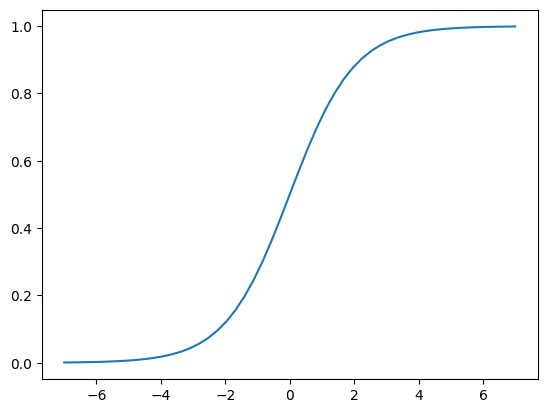

In [94]:
plt.plot(z, sigmoid(z))

In [95]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [96]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

# Training Logistic Regression

* `LogisticRegression().fit_transform(x)` - Scikit-Learn class for calculating the logistic regression model.
* `LogisticRegression().coef_[0]` - returns the coeffcients or weights of the LR model
* `LogisticRegression().intercept_[0]` - returns the bias or intercept of the LR model
* `LogisticRegression().predict[x]` - makes predictions on the x dataset (hard predictions)
* `LogisticRegression().predict_proba[x]` - makes predictions on the x dataset, and returns two columns with their probabilities for the two categories (soft predictions)

In [98]:
from sklearn.linear_model import LogisticRegression

In [103]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [104]:
model.coef_[0].round(3)

array([ 0.63 , -0.16 , -0.615, -0.054, -0.091,  0.027, -0.132, -0.04 ,
        0.015, -0.16 , -0.327,  0.314, -0.132,  0.003, -0.225,  0.124,
       -0.044,  0.076, -0.132, -0.089,  0.205, -0.132, -0.217, -0.241,
        0.096, -0.076, -0.069, -0.107, -0.186,  0.211, -0.064,  0.124,
       -0.269,  0.163, -0.139, -0.132,  0.126, -0.059, -0.132,  0.046,
        0.16 , -0.132, -0.173, -0.055,  0.   ])

In [105]:
model.intercept_[0]

-0.14501910919555452

In [113]:
# hard predictions: it's 1 (churn) or 0 (not churn)

model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
model.predict(X_train)[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [118]:
# soft predictions, i.e. showing probabilities
# 1st column shows the probability of being negative (0, not churn), 2nd - probability of positive, i.e. churn (1)

model.predict_proba(X_train)

array([[0.83572275, 0.16427725],
       [0.86564974, 0.13435026],
       [0.79671159, 0.20328841],
       ...,
       [0.75441588, 0.24558412],
       [0.99115008, 0.00884992],
       [0.89859729, 0.10140271]])

In [117]:
model.predict_proba(X_train)[:20]

array([[0.83572275, 0.16427725],
       [0.86564974, 0.13435026],
       [0.79671159, 0.20328841],
       [0.82163102, 0.17836898],
       [0.97042957, 0.02957043],
       [0.99218542, 0.00781458],
       [0.84658445, 0.15341555],
       [0.6750063 , 0.3249937 ],
       [0.98624488, 0.01375512],
       [0.48369781, 0.51630219],
       [0.42583757, 0.57416243],
       [0.86868949, 0.13131051],
       [0.69302761, 0.30697239],
       [0.98006953, 0.01993047],
       [0.35865263, 0.64134737],
       [0.60996509, 0.39003491],
       [0.57585057, 0.42414943],
       [0.82794132, 0.17205868],
       [0.91221176, 0.08778824],
       [0.91444364, 0.08555636]])

In [120]:
# we're interested in churn probabilities, therefore we'll filter out 2nd column
# we may use this to set out own threshold of classifying churn/not_churn

y_pred = model.predict_proba(X_val)[:,1] # we take validation
y_pred

array([0.16720728, 0.25313742, 0.43565655, ..., 0.71346827, 0.05055428,
       0.03602456])

In [121]:
# the default threshold is 0.5, we may select a different one

churn_decision = (y_pred >= 0.501)

In [122]:
churn_decision

array([False, False, False, ...,  True, False, False])

In [123]:
# selecting all the customers we think are going to churn

df_val[churn_decision]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
3,0337-cnpze,female,0,no,no,41,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic_check,106.30,4443.45
10,2038-oeqzh,male,0,no,no,4,yes,no,fiber_optic,no,no,yes,no,no,yes,month-to-month,no,electronic_check,86.05,308.10
11,9846-gkxas,female,0,no,no,9,yes,no,fiber_optic,no,no,no,no,yes,yes,month-to-month,yes,bank_transfer_(automatic),90.80,809.75
12,8051-hjrlt,female,1,no,no,1,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.55,70.55
13,8990-zxlsu,female,0,no,no,9,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,69.05,651.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2809-zmyoq,female,0,no,no,32,yes,yes,fiber_optic,no,no,yes,no,yes,yes,month-to-month,yes,electronic_check,101.35,3334.90
1396,3536-iqctx,male,1,yes,no,32,yes,yes,fiber_optic,no,no,no,no,no,yes,month-to-month,no,electronic_check,85.30,2661.10
1400,5196-sgoak,female,0,no,no,1,yes,no,fiber_optic,no,yes,no,no,no,no,month-to-month,yes,electronic_check,75.70,75.70
1401,3050-gbush,female,0,no,no,3,no,no_phone_service,dsl,no,no,no,no,yes,no,month-to-month,yes,credit_card_(automatic),34.80,113.95


To compare how accurate our predictions, we may compare our validation dataset target variable with our predictions

In [125]:
# validation target variable

y_val

array([0, 0, 1, ..., 1, 0, 0])

In [127]:
# our predictions
# y_pred = model.predict_proba(X_val)[:,1]
# churn_decision = (y_pred >= 0.501)

churn_decision

array([False, False, False, ...,  True, False, False])

In [128]:
# if they match, it returns 1, after that we sum and take its mean

(y_val == churn_decision).mean()

0.8041163946061036